# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using Seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
from csv import *

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [25]:
data = pd.read_csv('weight-height.csv')
male_df =  data[ data['Gender'] == "Male" ]
female_df =  data[data['Gender'] == "Female"]

data.groupby('Gender').std()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Height,Weight
Gender,,
Female,2.696284,19.022468
Male,2.863362,19.781155


In [5]:
len(male_df), len(female_df)

(5000, 5000)

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

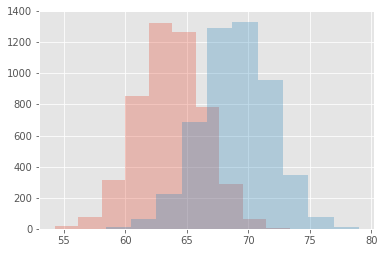

In [39]:
# Your code here
x = female_df['Height']
y = male_df['Height']
fig, ax = plt.subplots()
ax = x.hist(bins = 10, alpha = 0.3)
ax = y.hist(bins = 10, alpha = 0.3)

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.hist()`
- The function should return two lists carrying x and y coordinates for plotting the density function

(array([ 1.,  1.,  4.,  8., 27., 22., 16., 12.,  6.,  3.]),
 array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
        -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
         0.24307712]),
 <a list of 10 Patch objects>)

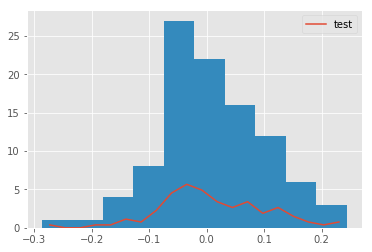

In [31]:
def density(x):
    n, bins = np.histogram(x, bins = 20, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy
    


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.hist(s)

## Add overlapping density plots to the histograms plotted earlier

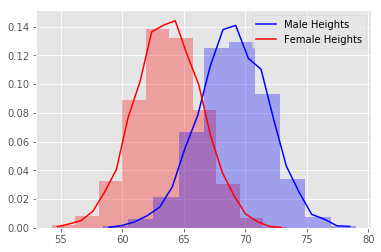

In [76]:
# You code here 
xf,yf = density(female_df.Height)
xm, ym = density(male_df.Height)
fig, ax = plt.subplots()

fh = female_df.Height
mh = male_df.Height

ax = fh.hist(bins = 10, alpha = 0.3, density = 1, color = "red")
ax = mh.hist(bins = 10, alpha = 0.3, density = 1, color = 'blue')
ax = plt.plot(xm,ym, label = 'Male Heights',  color = "blue")
ax = plt.plot(xf,yf, label = 'Female Heights', color = 'red')
plt.legend()

## Repeat the above exercise for male and female weights

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


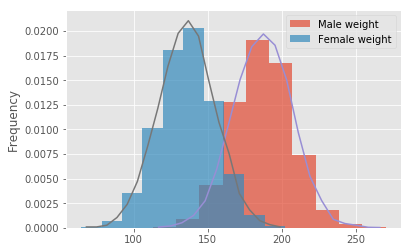

In [61]:
male_df.Weight.plot.hist(bins = 10, normed = True,  alpha = 0.7, label ="Male weight");
female_df.Weight.plot.hist(bins = 10, normed = True, alpha = 0.7, label = 'Female weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


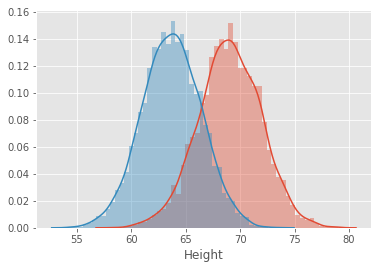

In [81]:
# Code for heights here
sns.distplot(mh);
sns.distplot(fh);

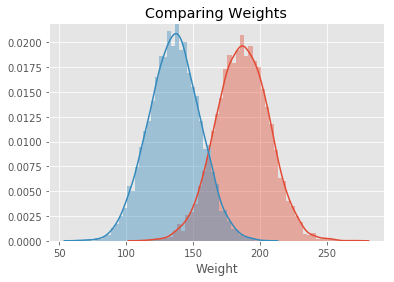

In [24]:
# Code for weights here

In [59]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.